# Earth Habitability Analysis Into The Substitution of the Sun with Stars in the LAMOST (DR2) Spectral Survey

Author: Raphael Bomshakian

# Introduction
The objective of this document is to determine what percentage of the stars recorded in the LAMOST (DR2) survey would render Earth uninhabitable if they were to take the place of the sun.

#### Determining Habitability
In this document, the "habitability" of Earth refers to whether the average global temperature of the Earth allows human life to exist, which is contingent on
the energy received by the Sun. Substituting a star with larger mass than the Sun would result in an average global temperature increase in the Earth. For the purposes of this analysis, two sample locations on Earth are taken to represent climatological outliers that will be used to provide an average relative humidity and temperature reading that will serve to represent the relative humidity of the Earth. While this is just one of multiple factors determining true habitability of the Earth (i.e., gravitational disruption which could catastrophically perturb orbit), observing temperature will provide a most accurate proportion if taking only one variable into account. This procedure will assume that orbital radius of the Earth remains fixed.

#### NOTE: Each cell of this document is written assuming that ALL cells preceding it have already been executed. Consider CTRL+A SHIFT+ENTER as a means to execute the code cells.

#### Figure 1.1., Heat Index

![https://www.weather.gov/images/safety/heatindexchart-650.jpg](https://www.weather.gov/images/safety/heatindexchart-650.jpg)

The heat index provides an "Extreme Danger" category when combinations of relative humidity and temperatures reach sufficient levels. In order for this chart to be useful, an average relative humidity of the Earth must be selected for which one can index changes in temperature as a result of extrasolar exposure. 

---

Now, the average temperature of the Earth if the Sun was replaced by a given star will be estimated using the following equation:

# $T(L) = \sqrt[4]{\frac{L(1-a)}{16\pi{}\sigma{}D^2}} + G$
Where 
- $L$ is the luminosity of the star
- $a$ is the albedo of the planet
- $\sigma$ is the Stefan-Boltzmann constant ($5.6703744199\times 10^{-8}W\cdot{m^{-2}}\cdot{}K^{-4}$) 
- $D$ is the distance to the star
- $G$ is the greenhouse constant, added to this equation to incorporate the effect of the Earth's atmosphere on the temperature calculation.
- $T(L)$ is the surface temperature in Kelvin of the planet.

The albedo and the distance to the star of Earth respectively are $0.30$ and $147660000000m.$ Earth's blackbody temperature is $-19^{\circ}C$, and its actual recorded temperature as a result of the atmosphere is $15^{\circ}C$. This gives a difference of $34^{\circ}C$, or $34K$ (There is no difference since both scales of temperature are linear). Thus $G = 34K$.

With this in mind, the equation that will be used in the calculations is as follows:

# $T(L) = \sqrt[4]{\frac{L(1-0.30)}{16\pi{}\cdot{}5.6703744199\times 10^{-8}\cdot{}2.1803476\times 10^{22}}} + 34$

https://en.wikipedia.org/wiki/Effective_temperature
https://energyeducation.ca/encyclopedia/Albedo#:~:text=The%20overall%20albedo%20of%20the,thus%20changes%20Earth's%20heat%20balance.

---

## Procedure
**Locations:**
1. Toronto, Ontario, Canada
2. Dubai, United Arab Emirates

These are two climaticalogically-distinct regions. The monthly range of relative humidity in Toronto is between $88.75\%$ and $59.21\%$. The average of the two is taken to be $73.98\%$. The average monthly relative humidity of Dubai is $52\%$. The average between these two, $63\%$, will be taken to represent the average global relative humidity of Earth. This means the minimum hot temperature that this document will consider uninhabitable (considered Extreme Danger) is $ 98^{\circ}F$ or $37^{\circ}C$.
(https://toronto.weatherstats.ca/normals.html)
(https://www.worlddata.info/asia/arab-emirates/climate-dubai.php)

An average temperature below $8^{\circ}C$ will be declared as too cold to be considered habitable.
https://news.ucar.edu/132755/scientists-nail-down-average-temperature-last-ice-age#:~:text=

Thus, our threshold of habitability is (8,37). Any surface temperatures outside this interval will be considered uninhabitable.

The average global temperature of the Earth is $15^{\circ}C$. 
https://www.space.com/17816-earth-temperature.html#:~:text=The%20average%20surface%20temperature%20on,planet's%20average%20temperature%20is%20rising.

For whatever reason should the interval be deemed inadequate for the reader, the threshold of acceptability can be modified in the below cell such that the proceding calculations may be deemed acceptable:

In [1]:
LOWER_LIMIT = 8
UPPER_LIMIT = 37

## Dataset
The dataset that will be used in this procedure comes from a VizieR query of an article recording various properties of 700480 stars in the LAMOST (DR2) survey. From the dataset, the following properties were selected for download in the form of a |-Separated-Values `.tsv` file:
1. Spectra ID "specID"
2. Solar Radius "Rad" ($Rsun$)
3. Solar Mass "Mass" ($Msun$)
4. Solar Luminosity "Lum" ($Lsun$)

https://cdsarc.u-strasbg.fr/viz-bin/Cat?J/other/AstBu/72.51
https://link.springer.com/article/10.1134/S1990341317030063
https://vizier.cds.unistra.fr/viz-bin/VizieR-2?-source=J%2Fother%2FAstBu%2F72.51%2Ftable1&-c=NaN%2BNaN&-c.rs=720.0

#### Reformatting
To convert the downloaded file to a .csv file, the following operations were done in Visual Studio Code:

1. Deletion of metadata at file start
2. Deletion of line 2 (superfluous metadata concerning units of table columns)
3. Deletion of line 2 (after step 2, line 2 becomes the delimiter between column names and values)
4. Ctrl+H Find and Replace " " character with "" (removal of whitespace)
5. Ctrl+H Find and Replace "|" character with "," character (format conversion from | separated values to comma separated values)
6. File extension conversion from .tsv to .csv

This produces the `lamost_raw.csv` file attached to this notebook's folder.

## Error Correction
Since the recorded values of the dataset were obtained statistically, there are some erroroneous values that prevent calculations, namely the presence of 5398 _negative_ luminosities in the dataset.

In [2]:
import pandas as pd
data = pd.read_csv("lamost_raw.csv")
len(list(filter(lambda L : L < 0 ,data["Lum"].tolist())))


5398

To amend this, the disruptive rows will be overrwitten with their absolute values. This will be done in the next step with the application of the `abs()` function.

#### Unit Conversion
The numerical data in the dataset are all expressed in the form of factors with the Sun. In order for the aforementioned formula to be applied, the dataset must be converted to units.
For each row in the dataset, with the values in columns 3, 4, and 5 represented as $K_r$, $K_m$, and $K_L$ respectively, the following write will be executed:

$Col_3 = K_r\cdot R_\odot{}$ where $R_\odot{}$ is the radius of the sun

$Col_4 = K_m\cdot M_\odot{}$ where $M_\odot{}$ is the mass of the sun

$Col_5 = |K_L\cdot L_\odot{}|$ where $L_\odot{}$ is the luminosity of the sun

In [3]:
data = pd.read_csv("lamost_raw.csv")

Rs = 6.96e+8
Ms = 2e+30
Ls = 3.846e+26

data['Rad'] = data['Rad'].map(lambda k_r : k_r*Rs)
data['Mass'] = data['Mass'].map(lambda k_m : k_m*Ms)
data['Lum'] = data['Lum'].map(lambda k_l : abs(k_l*Ls))

data.to_csv("stars.csv", index=False)

This produces values of the data for which the formula can now be applied.

#### Temperature Calculation
A new column will be added to the dataset of `stars.csv` named "EET" (Earth Exposure Temperature) representing the temperature of the Earth as a result of the star replacing the Sun. This is calculated by applying the temperature formula using the `Lum` value as the parameter. Note the subtraction by `C_offset` to convert the value from Kelvin to Celsius.

In [4]:
import math
data = pd.read_csv("stars.csv")

sigma = 5.6703744199e-8
a = 0.30
Dsq = 2.1803476e+22
C_offset = 273.15 

data.insert(4,"EET", data["Lum"].map(lambda L: math.sqrt(math.sqrt(((L*(1-a))/(16*math.pi*sigma*Dsq)))) + 34 - C_offset).tolist(),True)
data.to_csv("data.csv", index=False)

This produces the dataset that will be used to provide analysis.

## Analysis
The set of all habitable stars (stars that do not render Earth uninhabitable) is defined as $\{l\in{A}|8<T(l)<37\}$, where $A$ is the set of all luminosities in the dataset.
Using this, a list of habitable stars can be written:

In [5]:
data.query("EET < "+str(UPPER_LIMIT)+" and EET > "+str(LOWER_LIMIT)).to_csv("habitable_stars.csv", index=False)

In [6]:
habitable = pd.read_csv("habitable_stars.csv")
print(len(habitable), "habitable stars out of", len(data))
print(100 - round(len(habitable)/len(data)*100,2), "percent of stars are uninhabitable")


79508 habitable stars out of 700480
88.65 percent of stars are uninhabitable


### Question
Of the uninhabitable stars, how many of them are too hot and how many of them are too cold?

Matplotlib is building the font cache; this may take a moment.


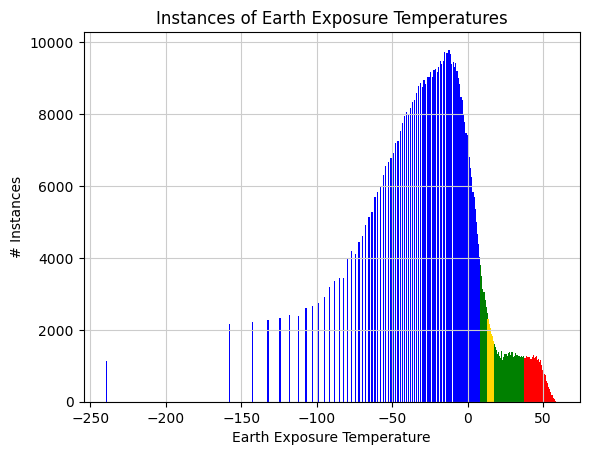

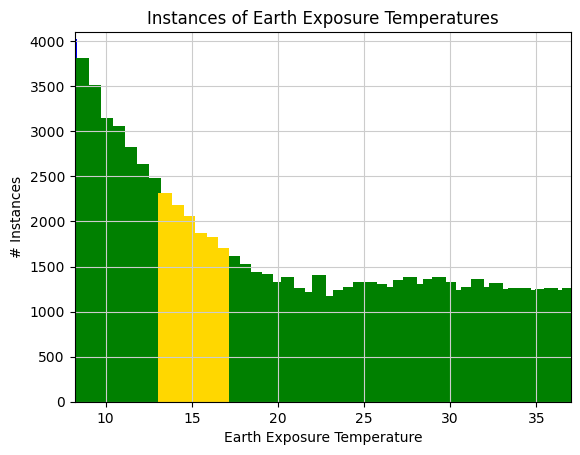

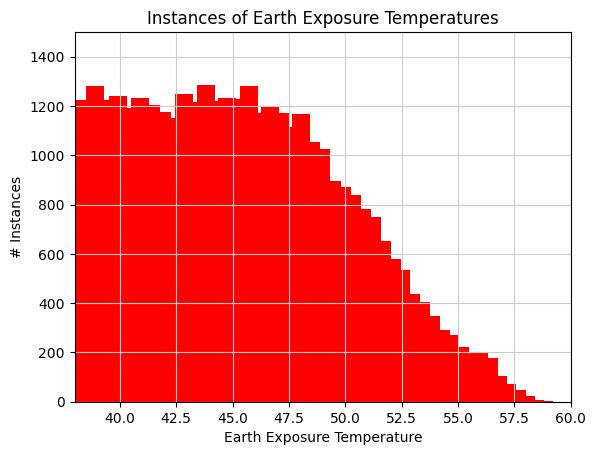

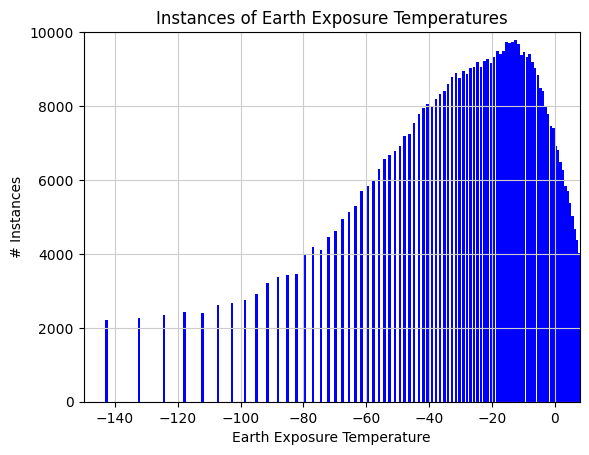

In [7]:
import matplotlib.pyplot as plt
import numpy as np

#get quantity of common temperatures
cold = data.query("EET < "+str(LOWER_LIMIT))["EET"].round(2).value_counts()
hot = data.query("EET > "+str(UPPER_LIMIT))["EET"].round(2).value_counts()
goldi = data.query("EET < "+str(UPPER_LIMIT)+" and EET > "+str(LOWER_LIMIT))["EET"].round(2).value_counts()
supergoldi = data.query("EET < 17 and EET > 13")["EET"].round(2).value_counts()

def plotEETQuant(axis=None):
    fig, ax = plt.subplots()
    plt.bar(cold.keys().tolist(), pd.Series(cold.values.tolist()), color = 'b')
    plt.bar(hot.keys().tolist(), pd.Series(hot.values.tolist()), color = 'r')
    plt.bar(goldi.keys().tolist(), pd.Series(goldi.values.tolist()), color = 'g')
    plt.bar(supergoldi.keys().tolist(), pd.Series(supergoldi.values.tolist()), color = 'gold')
    plt.title("Instances of Earth Exposure Temperatures")
    plt.xlabel("Earth Exposure Temperature")
    plt.ylabel("# Instances")
    if (axis != None):
        plt.axis(axis)
    plt.grid(axis=("both"), c='0.8')
    plt.show()
    
plotEETQuant()
plotEETQuant([LOWER_LIMIT+0.2, UPPER_LIMIT, 0, 4100])
plotEETQuant([UPPER_LIMIT+1, 60, 0, 1500])
plotEETQuant([-150, LOWER_LIMIT, 0, 10000])

<span style="color:Blue;font-weight:bold">Blue</span>: Stars that render a too-cold Earth.<br>
<span style="color:Red;font-weight:bold">Red</span>: Stars that render a too-hot Earth.<br>
<span style="color:Green;font-weight:bold">Green</span>: Stars that render a habitable Earth.<br>
<span style="color:Gold;font-weight:bold">Gold</span>: Stars that render an Earth with temperatures similar to that of the last decade.

While the dataset produces a graph with a distinct shape, there are many values missing on the temperature interval $[-250, 20]$. This can be explained by the sample size of the dataset comprising only $0.0007\%$ of the Milky Way. A larger dataset can reasonably be believed to show higher instance quantities with a much more refined shape.

The dataset shows that there are far more stars that render an Earth too cold to be inhabitable than ones that render Earths that are too hot.

In [8]:
print("Mean temperature of too-cold stars:",data.query("EET < "+str(LOWER_LIMIT))["EET"].mean().round(2), "degrees C")
print("Mean temperature of too-hot stars:",data.query("EET > "+str(UPPER_LIMIT))["EET"].mean().round(2), "degrees C")
print("Mean temperature of habitable stars:",data.query("EET < "+str(UPPER_LIMIT)+" and EET > "+str(LOWER_LIMIT))["EET"].mean().round(2), "degrees C")

Mean temperature of too-cold stars: -30.56 degrees C
Mean temperature of too-hot stars: 45.17 degrees C
Mean temperature of habitable stars: 20.9 degrees C


### Question
What is the relationship between mass, EET, and radius?

In [9]:
data = pd.read_csv("data.csv")

In [10]:
%pip install ipympl

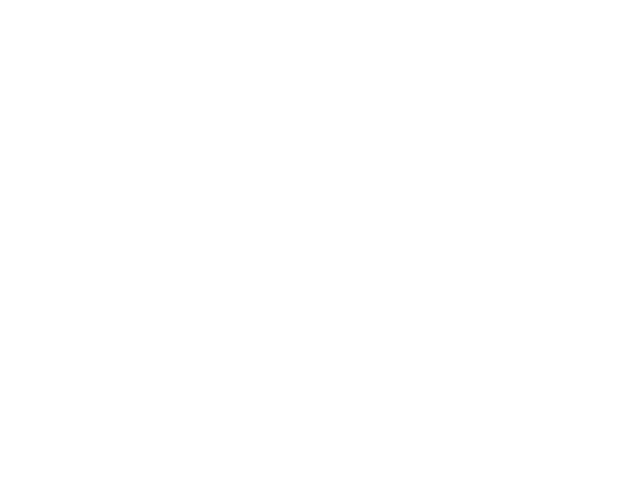

In [11]:
from mpl_toolkits.mplot3d import Axes3D


mass = data["Mass"].map(lambda x : x/Ms).squeeze()
rad = data["Rad"].map(lambda x : x/Rs).squeeze()
EET = data["EET"].squeeze()
plt.xlabel("Earth Exposure Temperature")
plt.ylabel("Solar Mass")
#plt.zlabel("Solar Radius")
#plt.scatter(EET,mass,rad, c="red")

%matplotlib widget
 

# creating figure
fig = plt.figure()
ax = Axes3D(fig)

#print(massHot)

#Reduce dataset to get every nth item, to improve refresh rate of 3D scatterplot
DERESOLUTION = 50
mass = mass[0::DERESOLUTION]
rad = rad[0::DERESOLUTION]
EET = EET[0::DERESOLUTION]

#plot points from the dataset on scatter plot with a specific color based on condition
def scatterFilt(filt, col):
    e = EET[filt]
    m = mass[e.keys()]
    r = rad[e.keys()]
    plot3d = ax.scatter(m,  e,  r, color=col, s = 1)
    
scatterFilt(EET < LOWER_LIMIT, "blue")
scatterFilt(EET > UPPER_LIMIT, "red")
scatterFilt((EET > 13) & (EET <17), "gold")
scatterFilt((EET > LOWER_LIMIT) & (EET <13) | (EET >17) & (EET <UPPER_LIMIT) , "green")


# setting title and labels
ax.set_title("Solar Mass vs. Earth Exposure Temperature vs. Solar Radius")
ax.set_xlabel('Solar Mass (Msun)')
ax.set_ylabel('EET (C)')
ax.set_zlabel('Solar Radius (Rsun)')
 
# displaying the plot
plt.show()

> The interactive plot requires impractical rendering time when plotting all points of the dataset, necessitating the downscaling of the dataset in order to run practically.<br>
> In the interest of the reader's time, here is a screenshot of all 700480 stars plotted:
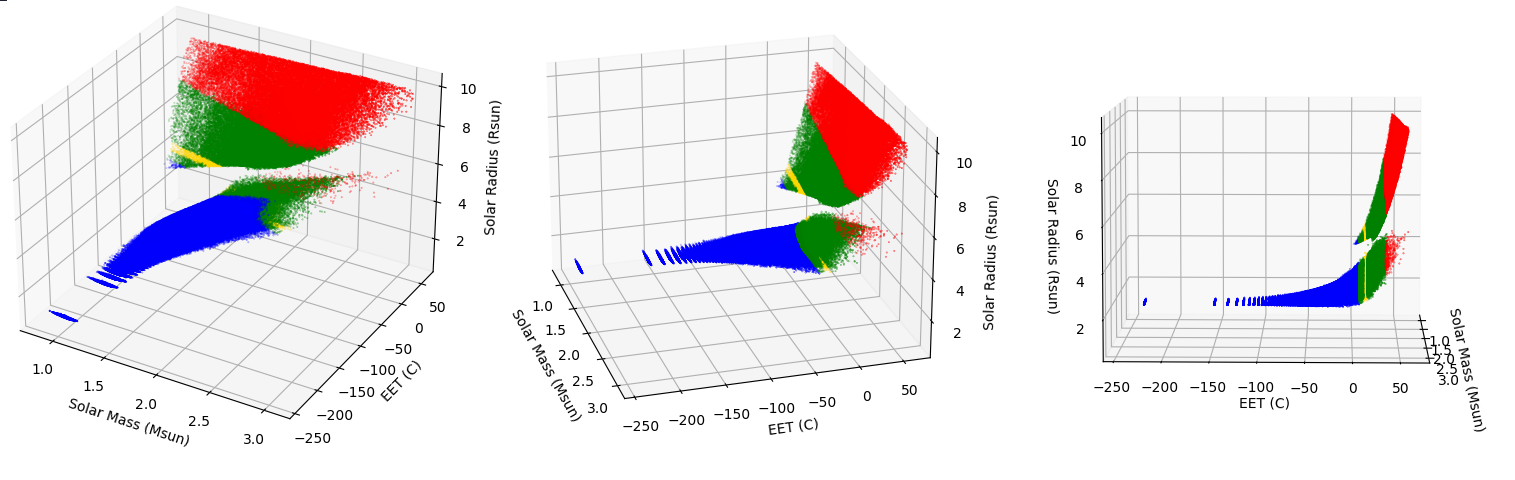
If the image cannot be viewed for whatever reason it is in the project directory.



There is a remarkable absence of datapoints corresponding to solar radii of ~4, scaling with mass. This could be the result of parameters chosen by the authors of the original LAMOST dataset study.
The set of too-cold stars being relatively flat demonstrates low variance of solar radius among stars that are too cold to keep Earth warm, in contrast to the too-hot stars.

The graph demonstrates adequate variances of solar mass as well as solar radius among habitable stars, demonstrating that there are specific parameters such that there exists typical mass, extreme radius habitable stars, though this relationship demonstrates a lack of extreme mass, typical radius habitable stars. This can be explained through the relationship between stellar mass and radius.

Furthermore, the graph also suggests the existence of stars that have nigh-identical radii and mass to habitable stars that are in fact uninhabitable.

The golden stars span over most of the dataset with regards to mass, in addition to spanning a significant interval of the lower half of habitable stars. This suggest that there exists stars that are twice as large as the sun and over 4 times as radial as the sun which are nigh-identical in luminosity and therefore reflect similar habitability.

---
# Sources

[Effective Temperature](https://en.wikipedia.org/wiki/Effective_temperature)<br>
[Albedo of Earth](https://energyeducation.ca/encyclopedia/Albedo#:~:text=The%20overall%20albedo%20of%20the,thus%20changes%20Earth's%20heat%20balance.)<br>
[Sichevskij S.G. *Estimates of the radii, masses, and luminosities of LAMOST stars. (2017)](https://link.springer.com/article/10.1134/S1990341317030063)<br>
[VizieR Entry for Sichevskij S.G. *Estimates of the radii, masses, and luminosities of LAMOST stars. (2017)* ](https://cdsarc.u-strasbg.fr/viz-bin/Cat?J/other/AstBu/72.51)<br>
[VizieR Database Download for Sichevskij S.G. *Estimates of the radii, masses, and luminosities of LAMOST stars. (2017)](https://vizier.cds.unistra.fr/viz-bin/VizieR-2?-source=J%2Fother%2FAstBu%2F72.51%2Ftable1&-c=NaN%2BNaN&-c.rs=720.0)<br>
[Ice Age of the Earth](https://news.ucar.edu/132755/scientists-nail-down-average-temperature-last-ice-age#:~:text=)<br>
[Toronto Average Temperature and Relative Humidity](https://toronto.weatherstats.ca/normals.html)<br>
[Dubai Average Temperature and Relative Humidity](https://www.worlddata.info/asia/arab-emirates/climate-dubai.php)<br>


## Libraries Downloaded
- ipympl (for 3D graph plotting)